Notre objectif est d'aider les gynécologues à déterminer les facteurs à risque d’accouchement prématuré et pouvoir entre autre de savoir si la future maman en question aura réellement besoin d’un accouchement prématuré.

In [2]:
import pandas as pd
import numpy as np

Le fichier "Accouchement.xls" porte sur les facteurs prénataux (médicaux et de
personne) liés à un accouchement prématuré chez les femmes déjà en travail prématuré. 

In [5]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vRQ8N-92qj_uj8_8G4rHbPqYqQjnKKyJQObFb9pR5BdDO3xbykC8NwGxrEftVmTdufV3AGs-KLa3EDb/pub?output=xlsx'
dt = pd.read_excel('Accouchement.xlsx')


GEST: l'âge gestationnel en semaines à l'entrée dans l'étude
DILATE: la dilatation du col en cm
EFFACE: l’effacement du col (en %)
CONSIS: la consistance du col (1= mou, 2= moyen, 3=ferme)
CONTR: la présence (=1) ou non (=2) de contraction
MEMBRAN: les membranes rupturées (=1) ou non (=2) ou incertain (=3)
AGE: l’âge de la patiente
STRAT: période de la grossesse
GRAVID: la gestité (nombre de grossesses antérieures y compris celle en cours)
PARIT: la parité (nombre de grossesses à terme antérieures)
DIAB: la présence (=1) ou non (=2) d'un problème de diabète, ou valeur manquante (=9)
BEBAGE: âge gestationnel (en jours) du bébé à la naissance
TRANSF: le transfert (1) ou non (2) vers un hôpital en soins spécialisés
GEMEL: grossesse simple (=1) ou multiple (=2) 

In [6]:
dt.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,31,3,100,3,1,2,26,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,8,0,3,1,2,25,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,3,100,3,2,2,28,3,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,2,75,3,2,2,27,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,6,75,3,2,2,17,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 13 variables ont été retenues pour 390 femmes enrôlées dans l'étude.

In [8]:
print(dt.shape)

(390, 26)


In [9]:
print(dt['PREMATURE'].unique())

['positif' 'negatif']


In [10]:
print(dt.groupby('PREMATURE').size())

PREMATURE
negatif    124
positif    266
dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


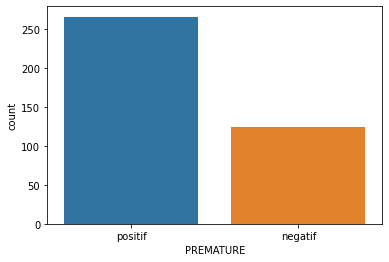

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(dt['PREMATURE'],label="Count")
plt.show()

In [12]:
#Interpretation

In [13]:
dt.describe()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,30.302564,1.241026,43.979487,2.392308,1.094872,1.802564,26.341026,3.225641,2.302564,0.779487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.145281,1.307821,34.829435,0.722351,0.310443,0.480460,5.150098,0.814622,1.450377,1.007728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.000000,0.000000,0.000000,2.000000,1.000000,2.000000,23.000000,3.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,1.000000,50.000000,3.000000,1.000000,2.000000,26.000000,3.000000,2.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,33.000000,2.000000,75.000000,3.000000,1.000000,2.000000,30.000000,4.000000,3.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,100.000000,3.000000,3.000000,3.000000,42.000000,4.000000,13.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Diviser les données en données d'apprentissage et données de test 

In [15]:
X= dt.iloc[:,0:13].values
y= pd.factorize(dt['PREMATURE'])[0]

In [27]:
X

array([[ 31,   3, 100, ...,   2,   2,   1],
       [ 28,   8,   0, ...,   2,   1,   2],
       [ 31,   3, 100, ...,   2,   1,   1],
       ...,
       [ 31,   2, 100, ...,   2,   1,   2],
       [ 29,   0,   0, ...,   2,   1,   1],
       [ 31,   1, 100, ...,   2,   2,   1]], dtype=int64)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
#Centrage Réduction avec MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
#Appliquer kNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier


In [22]:
# Choisir le nombre de voisins optimal

Text(0, 0.5, 'Erreur')

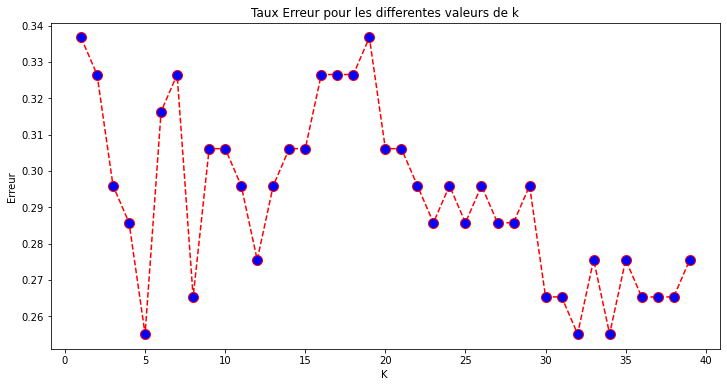

In [23]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [24]:
#Interpretation
#Le meilleur nombre de voisins k=5

In [25]:
knn = KNeighborsClassifier(5)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [26]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

In [ ]:
#Les arbres de décision: Appliquer CART 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [ ]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

In [ ]:
#Courbe ROC

In [ ]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
#matplotlib inline

from sklearn.metrics import roc_curve, auc

In [ ]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)

fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

In [ ]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)

plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()